<font size=6>
Проверка нормальности распределения

Выполнил: Иванов Роман, ММБ-004

# Введение

Цель работы: провести проверку нормальности распределения исследуемого показателя, определенного на разных генеральных совокупностях. Данные представлены в виде объедененной выборки, состоящей из четырех частей представляющих разные генеральные совокупности. Переменная-индикатор определяет, к какой части относится тот или иной элемент объединенной выборки.

Подключение библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

Извлечение данных из файла

In [ ]:
ds0=pd.read_excel("ML.ds2.xlsx")
ds0

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v72,v73,v74,v75,v76,v77,v78,v79,v80,G
0,6.059313,-1.855521,-17.162673,11.044343,-23.341780,-42.520243,53.133029,17.829904,15.312515,46.026926,...,18.143563,-14.173505,-12.908814,-30.324509,11.314424,35.557165,18.456091,7.427282,-30.388955,1
1,11.853664,-1.287746,-26.281267,-21.672478,0.978450,-19.722558,-45.017433,19.227115,34.183479,65.385567,...,1.447923,-4.507531,-5.578855,3.159857,30.422340,34.115070,18.175637,7.389731,-29.035627,3
2,7.770431,-6.649831,-18.138106,-9.144086,-6.882682,-50.593063,-7.432258,18.870878,32.183995,-15.468149,...,17.018063,-6.249020,-21.093471,-11.894213,30.611333,-9.326853,11.518727,39.650201,-28.201074,3
3,9.634201,18.295676,-1.251677,-5.454505,-10.419025,-15.419516,3.636486,14.139482,19.376166,-1.363523,...,5.788373,13.385526,-0.883430,-28.111708,7.078885,24.275838,23.820348,-2.653444,-26.810639,1
4,9.693239,-2.421079,-10.350603,-9.555780,14.607057,13.658101,-8.667340,20.476363,27.179034,42.885804,...,4.913177,-16.022962,-20.864255,-17.932962,20.897679,-5.641990,7.759069,-1.067956,-24.843948,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,13.093231,-3.841812,-31.574344,-19.366295,12.349862,-8.109772,-38.098884,12.164525,9.914687,37.743749,...,8.203809,3.948609,-19.115411,19.979700,25.287128,15.830407,20.846346,22.376578,76.898678,1
1396,12.142872,12.482686,3.818097,-9.440888,-27.774032,-47.837485,-8.322664,-1.228660,32.247943,31.930054,...,9.636445,-14.281234,-9.964427,8.848576,45.356607,11.322087,-9.787732,4.541500,79.154225,1
1397,4.644531,9.041294,5.761300,-19.282417,-2.181760,-59.122741,-37.847250,25.224062,-26.323112,36.524298,...,-4.145583,-26.408232,-15.694540,-12.970088,15.757011,40.161573,42.421629,42.952213,85.032471,1
1398,9.363536,12.533379,-6.838237,-30.175139,-29.440737,-28.805840,-70.525417,-3.745504,49.071180,17.408084,...,0.151256,-12.667154,0.781810,-22.384279,11.230092,27.710772,14.908584,26.325615,88.166954,1


Вывод таблицы соответствующего варианата

In [ ]:
ds=ds0[['v46','G']].rename({'v46':'s46', 'G':'FACTOR'}, axis=1)
ds

,s46,FACTOR
0,-4.331135,1
1,1.839309,3
2,-41.680399,3
3,30.815378,1
4,-10.796961,1
...,...,...
1395,15.071365,1
1396,3.435972,1
1397,15.376910,1
1398,1.086793,1


Из объедененной выборки выделим 4 независимые выборки в соответветсвии с уровнями FACTOR.

In [ ]:
sample1 = ds.s46[ds.FACTOR == 1]
sample1

0       -4.331135
3       30.815378
4      -10.796961
6        8.926205
10      -9.678828
          ...    
1393    31.125561
1395    15.071365
1396     3.435972
1397    15.376910
1398     1.086793
Name: s46, Length: 350, dtype: float64

In [ ]:
sample2 = ds.s46[ds.FACTOR == 2]
sample2

7       35.605507
29       6.219709
30      -6.193126
31     -54.401882
32       1.916302
          ...    
1381    -4.913052
1385   -39.111907
1388    -3.423585
1391    36.904538
1392    27.917898
Name: s46, Length: 350, dtype: float64

In [ ]:
sample3 = ds.s46[ds.FACTOR == 3]
sample3

1        1.839309
2      -41.680399
5       -8.761102
8       28.305127
9       -9.663958
          ...    
1384    17.259177
1389     8.046951
1390    15.253287
1394    -6.898775
1399     9.560100
Name: s46, Length: 350, dtype: float64

In [ ]:
sample4 = ds.s46[ds.FACTOR == 4]
sample4

169     17.834437
171     16.750420
174     11.066652
175     22.577929
176     18.970641
          ...    
1225    10.903684
1229     8.742058
1230    14.521043
1235    14.560411
1239    -1.709006
Name: s46, Length: 350, dtype: float64

# Визуализация данных

Для каждой из четырех выборок с помощью гистограммы и квантильного графика  проанализируем, можно ли использовать нормальное распределение для описания исследуемого показателя, определенного на соответствующей генеральной совокупности.

## Выборка 1

Построим эмпирическую кривую с наложенной на нее кривой нормального распределения.

<Axes: title={'center': 'Гистограмма'}, xlabel='Выборочные значения', ylabel='Density'>

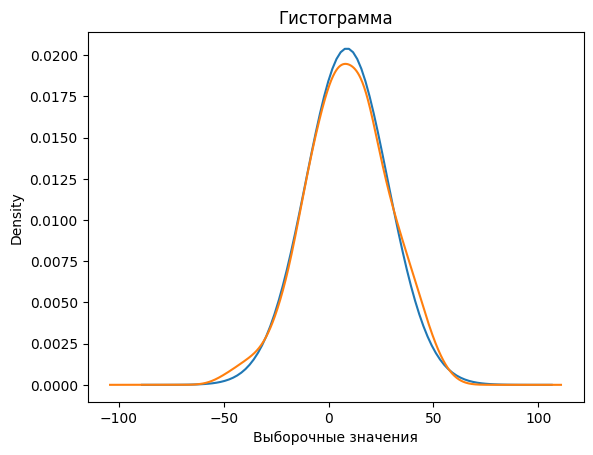

In [ ]:
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample1) - 5*np.std(sample1), np.mean(sample1) + 5*np.std(sample1), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample1), np.std(sample1)))
sample1.plot.kde()

Эмпирическая кривая плотности близка к линии плотности нормального распределения. Нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

Построим квантильный график.

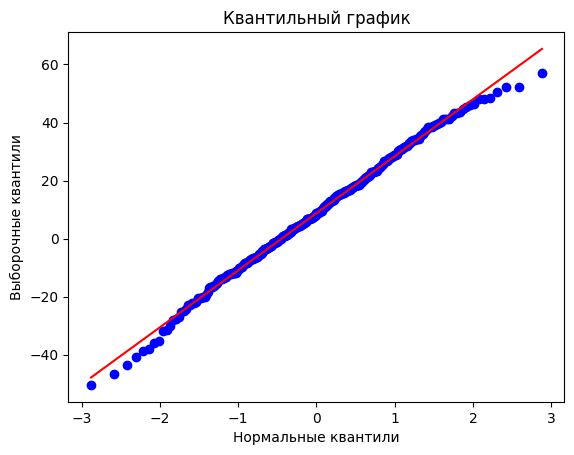

In [ ]:
res = stats.probplot(sample1, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей совпадает с квантилям нормального распределения. Нормальное распределение подходит для описания исследуемого показателя первой генеральной совокупности.

Анализ диаграмм показал, что для данной выборки нормальное распределение подходит для описания исследуемого показателя.

## Выборка 2

Построим эмпирическую с наложенной на нее кривой нормального распределения.

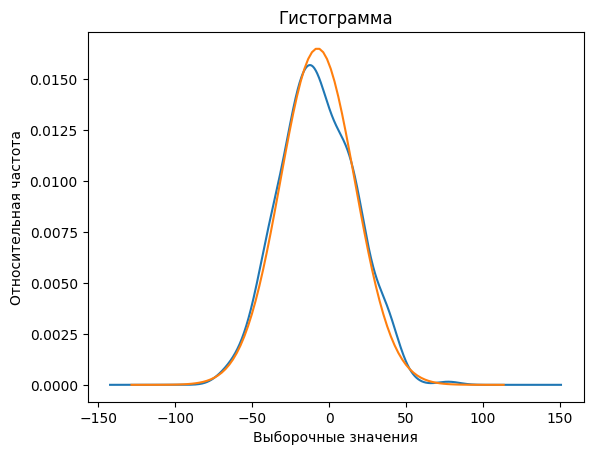

In [ ]:
sample2.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample2) - 5*np.std(sample2), np.mean(sample2) + 5*np.std(sample2), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample2), np.std(sample2)))

Эмпирическая кривая плотности близка к линии плотности нормального распределения. Нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

Построим квантильный график.

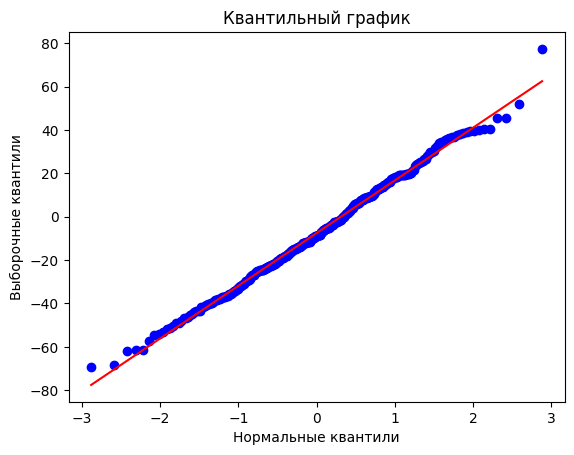

In [ ]:
res = stats.probplot(sample2, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей совпадает с квантилям нормального распределения. Нормальное распределение подходит для описания исследуемого показателя второй генеральной совокупности.

Анализ диаграмм показал, что для данной выборки нормальное распределение подоходит для описания исследуемого показателя.

## Выборка 3

Построим эмпирическую кривую с наложенной на нее кривой нормального распределения.

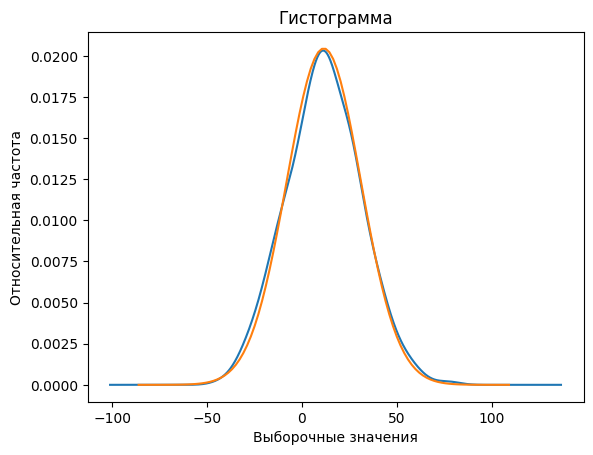

In [ ]:
sample3.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample3) - 5*np.std(sample3), np.mean(sample3) + 5*np.std(sample3), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample3), np.std(sample3)))

Эмпирическая кривая плотности близка к линии плотности нормального распределения. Нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

Построим квантильный график.

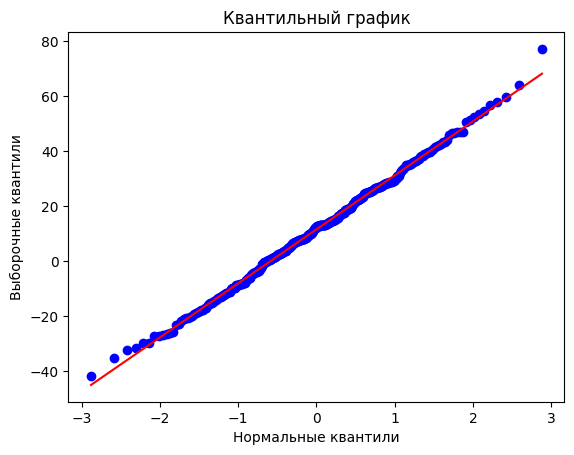

In [ ]:
res = stats.probplot(sample3, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Большая часть выборочных квантилей совпадает с квантилям нормального распределения. Нормальное распределение подходит для описания исследуемого показателя третьей генеральной совокупности.

Анализ диаграмм показал, что для данной выборки нормальное распределение подоходит для описания исследуемого показателя.

## Выборка 4

Построим эмпирическую кривую с наложенной на нее кривой нормального распределения.

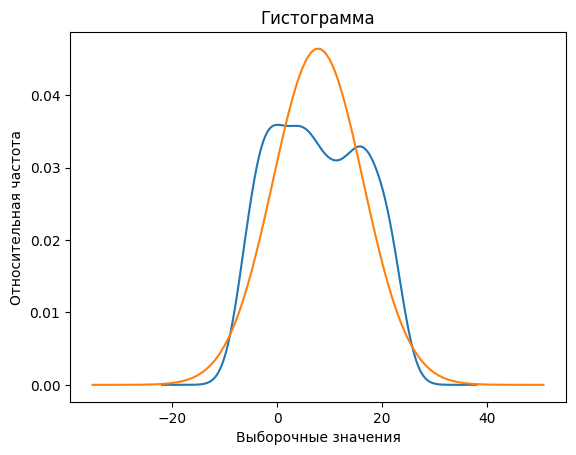

In [ ]:
sample4.plot.kde()
plt.title("Гистограмма")
plt.ylabel("Относительная частота")
plt.xlabel("Выборочные значения")
x = np.linspace(np.mean(sample4) - 5*np.std(sample4), np.mean(sample4) + 5*np.std(sample4), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(sample4), np.std(sample4)))

Эмпирическая кривая плотности не близка к линии плотности нормального распределения. Нормальное распределение не подходит для описания исследуемого показателя четвёртой генеральной совокупности.

Построим квантильный график.

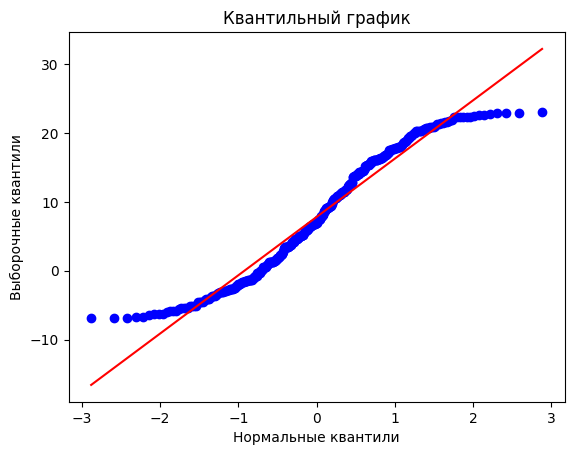

In [ ]:
res = stats.probplot(sample4, plot=plt)
plt.title("Квантильный график")
plt.ylabel("Выборочные квантили")
plt.xlabel("Нормальные квантили")
plt.show()

Выборочные квантили явно отклоняются от нормальных. Нормальное распределение не подходит для описания исследуемого показателя четвертой генеральной совокупности.

Анализ диаграмм показал, что для данной выборки нормальное распределение не подходит для описания исследуемого показателя.

## Итоги визуализации

Анализ диаграмм и квантильных графиков показал, что для 3 первых генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, для четвертой генеральной совокупности нормальное распределение не подходит для описания исследуемого показателя.

# Использование тестов

Проверим гипотезу о нормальном распределении с помощью тестов Шапиро-Уилка, Колмогорова-Смирнова, Крамера-Майзеса, Харке-Бера и Д'Агостино. Используем, соответственно, функции shapiro, jarque_bera, kstest, cramevonmises и normaltest пакета stats.

## Выборка 1

In [ ]:
stats.shapiro(sample1)

ShapiroResult(statistic=0.9959818720817566, pvalue=0.5173398852348328)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.jarque_bera(sample1)

SignificanceResult(statistic=1.4775175931730318, pvalue=0.4777064786111903)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.kstest(sample1, 'norm', (np.mean(sample1), np.std(sample1)))

KstestResult(statistic=0.02212606246284854, pvalue=0.9941053607595149, statistic_location=14.66948222310748, statistic_sign=-1)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.cramervonmises(sample1, 'norm', (np.mean(sample1), np.std(sample1)))

CramerVonMisesResult(statistic=0.0169506902980391, pvalue=0.9990403335782705)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.normaltest(sample1)

NormaltestResult(statistic=1.4481448939324166, pvalue=0.48477401408851184)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

Все тесты показали, что для первой выборки гипотеза о нормальном распределении не отвергается.

## Выборка 2

In [ ]:
stats.shapiro(sample2)

ShapiroResult(statistic=0.9956986904144287, pvalue=0.4532051980495453)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.jarque_bera(sample2)

SignificanceResult(statistic=1.4418072385630827, pvalue=0.4863126158996849)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.kstest(sample2, 'norm', (np.mean(sample2), np.std(sample2)))

KstestResult(statistic=0.031603309388455736, pvalue=0.864476868232271, statistic_location=-8.241897962245275, statistic_sign=1)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.cramervonmises(sample2, 'norm', (np.mean(sample2), np.std(sample2)))

CramerVonMisesResult(statistic=0.05621903734227946, pvalue=0.8380901881286084)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.normaltest(sample2)

NormaltestResult(statistic=1.3438151279446247, pvalue=0.510733391350199)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

Все тесты показали, что для второй выборки гипотеза о нормальном распределении не отвергается.

## Выборка 3

In [ ]:
stats.shapiro(sample3)

ShapiroResult(statistic=0.9978649616241455, pvalue=0.9380601048469543)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.jarque_bera(sample3)

SignificanceResult(statistic=0.46119890187207013, pvalue=0.7940574613175)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.kstest(sample3, 'norm', (np.mean(sample3), np.std(sample3)))

KstestResult(statistic=0.02536000860480414, pvalue=0.9738091221072841, statistic_location=28.999980966327712, statistic_sign=1)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.cramervonmises(sample3, 'norm', (np.mean(sample3), np.std(sample3)))

CramerVonMisesResult(statistic=0.03349967304768154, pvalue=0.9634976078592031)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

In [ ]:
stats.normaltest(sample3)

NormaltestResult(statistic=0.4693685904896102, pvalue=0.7908204760073259)

p-значение pvalue больше уровня значимости 0,05. Гипотеза о нормальном распределении не отвергается.

Все тесты показали, что для третьей выборки гипотеза о нормальном распределении не отвергается.

## Выборка 4

In [ ]:
stats.shapiro(sample4)

ShapiroResult(statistic=0.9548825621604919, pvalue=6.922131312592228e-09)

p-значение pvalue меньше уровня значимости 0,05, следовательно гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05.

In [ ]:
stats.jarque_bera(sample4)

SignificanceResult(statistic=21.074080025146273, pvalue=2.653515732943421e-05)

p-значение pvalue меньше уровня значимости 0,05, следовательно гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05.

In [ ]:
stats.kstest(sample4, 'norm', (np.mean(sample4), np.std(sample4)))

KstestResult(statistic=0.07309943486345671, pvalue=0.04513026516682561, statistic_location=15.173833429975279, statistic_sign=-1)

p-значение pvalue меньше уровня значимости 0,05, следовательно гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05.

In [ ]:
stats.cramervonmises(sample4, 'norm', (np.mean(sample4), np.std(sample4)))

CramerVonMisesResult(statistic=0.5943767338180569, pvalue=0.023052976654302393)

p-значение pvalue меньше уровня значимости 0,05, следовательно гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05.

In [ ]:
stats.normaltest(sample4)

NormaltestResult(statistic=189.4873234321092, pvalue=7.13428609881657e-42)

p-значение pvalue меньше уровня значимости 0,05, следовательно гипотеза о нормальном распределении отвергается с вероятностью возможной ошибки равной 0,05.

4 теста показали, что для четвертой выборки гипотеза о нормальном распределении отвергается.

## Итоги исследования

Анализ диаграмм и квантильных графиков показал, что для 3 первых генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, для четвертой генеральной совокупности нормальное распределение не подходит дяя описания исследуемого показателя.


Тесты показали, что для трёх первых генеральных совокупностей гипотеза о нормальном распределении не отвергается, а для четвёртой генеральной совокупности гипотеза о нормальном распределении отвергается.

Анализ диаграмм и резултаты тестов показывают, что для первых 3 генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, а для 4-ой не подходи.

# Заключение

Цель работы — проверить гипотезу о нормальности распределения исследуемого
признака генеральной совокупности.

Была проведена проверка гипотезы о нормальном распределении. Были использованы библиотеки: pandas, matplotlib.pyplot, scipy.stats, numpy.

Использованные инструменты: диаграммы и квантильные графики, тесты Шапиро-Уилка, Колмогорова-Смирнова, Крамера-Майзеса, Харке-Бера и Д'Агостино. Использовались, соответственно, функции shapiro, jarque_bera, kstest, cramevonmises и normaltest пакета stats.

По итогам анализа диаграмм и тестов можно сказать:

Для трёх первых генеральных совокупностей нормальное распределение подходит для описания исследуемого показателя, для четвертой генеральной совокупности нормальное распределение не подходит для описания исследуемого показателя.

Для трёх первых генеральных совокупностей гипотеза о нормальном распределении не отвергается, а для четвёртой генеральной совокупности гипотеза о нормальном распределении отвергается.